In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# log(1/t) = D + 1.018 * z1 * z2 * sqrt(I)
# I = E Ci Zi**2

t = np.array([213, 140, 127, 106, 96, 86])
n = np.arange(1, 7)

I_base = 0.002 * (1 + 2**2) + 0.04 * (1 + 1) + 0.02 * (1 + 2**2)
I = I_base + np.array([0., 0.2, 0.4, 0.8, 1.6, 3.2])

sqrt_I = np.sqrt(I)

i_t = 1 / t
log_i_t = np.log10(i_t)

d = {
    'n': n,
    'I': I,
    'sqrt_I': sqrt_I,
    't': t,
    '1/t': i_t,
    'log(1/t)': log_i_t,
}

df = pd.DataFrame(d)
df.set_index('n', inplace=True)
df

,I,sqrt_I,t,1/t,log(1/t)
n,,,,,
1,0.19,0.435890,213,0.004695,-2.328380
2,0.39,0.624500,140,0.007143,-2.146128
3,0.59,0.768115,127,0.007874,-2.103804
4,0.99,0.994987,106,0.009434,-2.025306
5,1.79,1.337909,96,0.010417,-1.982271
6,3.39,1.841195,86,0.011628,-1.934498


In [15]:
from scipy.stats import linregress
line = linregress(sqrt_I, log_i_t)
slope, b = line[0], line[1]
f = lambda x: slope * x + b

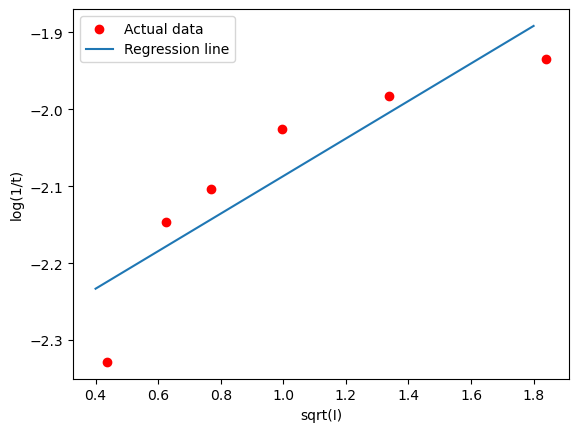

In [18]:
plt.scatter(sqrt_I, log_i_t, label='Actual data', c='r')

x = np.linspace(0.4, 1.8, 100)
plt.plot(x, f(x), label='Regression line')
plt.xlabel('sqrt(I)')
plt.ylabel('log(1/t)')
plt.legend()
plt.show()

In [21]:
z1z2 = slope / 1.018

print(f'slope = {slope: .4}')
print(f'z1z2 = {z1z2: .4}')

slope =  0.2439
z1z2 =  0.2396
